<a href="https://colab.research.google.com/github/safranco8/Mentoria2022-G2/blob/main/TP2_analisis_y_curacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicción de Ventas en las Sucursales de una Cadena de Supermercados

# Trabajo Práctico N°2: Análisis y Curación

## Introducción


En este práctico se busca profundizar el conocimiento de las series bajo estudio y realizar tareas de preprocesamiento.

En lo desarrollado en el primer práctico pudimos notar algunas características propias de los datos de series temporales y en particular de las ventas de las sucursales. Algunas de ellas son que se trata de series no estacionarias, o sea que sus distribuciones cambian a través del tiempo pero no parecen presentar raíces unitarias. Además, se aprecian patrones de estacionalidad. Lo antes descripto tiene consecuencias directas en la selección de las metodologías adecuadas para abordar las problemáticas de tratamiento de valores faltantes, detección de outliers y la construcción de modelos predictivos y/o causales.



### Carga del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://www.dropbox.com/s/bbt21ors7tms6bn/train.csv?dl=1"
df = pd.read_csv(url)

In [3]:
df.drop(['id','onpromotion'], axis = 1, inplace = True)
df  = df.groupby(by=['store_nbr','date']).sum().unstack(0)
df = df['sales']
df=df.add_prefix('Store ')

In [4]:
df

store_nbr,Store 1,Store 2,Store 3,Store 4,Store 5,Store 6,Store 7,Store 8,Store 9,Store 10,...,Store 45,Store 46,Store 47,Store 48,Store 49,Store 50,Store 51,Store 52,Store 53,Store 54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,10598.619020,13520.485002,11997.502000,14659.32800,15867.484000,5430.08800,...,27612.050950,27149.92000,27263.111010,19700.000000,16281.845000,16576.132000,15134.490990,0.000,0.00000,4973.285000
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,7770.968000,9929.393000,9277.958000,10781.24300,10431.719000,4549.52998,...,17377.980970,15751.35500,18340.205000,14350.784030,9909.082000,11066.465040,11170.057015,0.000,0.00000,3901.570000
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,7347.641991,8869.211980,8096.573018,11124.65100,8085.159000,3381.01600,...,19936.195040,17073.06408,18982.008970,15276.803001,10284.566000,12147.440000,12452.326000,0.000,0.00000,3266.966000
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,8192.598000,12431.689040,8610.605999,14277.69902,13057.110000,5409.78501,...,27104.223034,27231.19803,26996.263995,22876.474000,13506.025000,17930.364000,15046.247000,0.000,0.00000,4394.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742021,13081.771001,32885.759996,10819.543000,9510.871000,15775.922000,15090.052970,18440.07100,15569.746000,5932.17900,...,42991.258000,32020.67400,38072.657020,26365.391000,32977.570000,21339.243004,26070.018000,30742.706,12033.40700,8513.834000
2017-08-12,7543.623000,12382.416000,31903.476000,10622.300000,8157.070000,14502.508000,14668.772022,19548.54801,16901.506991,6322.80800,...,38285.203104,28639.05300,34385.410000,24749.852000,30722.046040,19413.958001,19532.964000,22525.366,12316.15790,9139.678002
2017-08-13,3902.782000,13766.822095,34845.119300,13065.903000,10044.821000,19261.918980,14871.927000,21646.66000,18128.805000,6773.54200,...,46029.399000,32935.39800,38953.744000,29164.995000,32984.485000,21221.233000,25713.284030,24232.105,12750.17602,14246.827996


Guardado del dataset

In [5]:
file_name = 'dataset.xlsx'
df.to_excel(file_name)

Lectura

In [6]:
df = pd.read_excel('dataset.xlsx',index_col=0 ,parse_dates=True)

In [7]:
df

,Store 1,Store 2,Store 3,Store 4,Store 5,Store 6,Store 7,Store 8,Store 9,Store 10,...,Store 45,Store 46,Store 47,Store 48,Store 49,Store 50,Store 51,Store 52,Store 53,Store 54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,10598.619020,13520.485002,11997.502000,14659.32800,15867.484000,5430.08800,...,27612.050950,27149.92000,27263.111010,19700.000000,16281.845000,16576.132000,15134.490990,0.000,0.00000,4973.285000
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,7770.968000,9929.393000,9277.958000,10781.24300,10431.719000,4549.52998,...,17377.980970,15751.35500,18340.205000,14350.784030,9909.082000,11066.465040,11170.057015,0.000,0.00000,3901.570000
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,7347.641991,8869.211980,8096.573018,11124.65100,8085.159000,3381.01600,...,19936.195040,17073.06408,18982.008970,15276.803001,10284.566000,12147.440000,12452.326000,0.000,0.00000,3266.966000
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,8192.598000,12431.689040,8610.605999,14277.69902,13057.110000,5409.78501,...,27104.223034,27231.19803,26996.263995,22876.474000,13506.025000,17930.364000,15046.247000,0.000,0.00000,4394.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742021,13081.771001,32885.759996,10819.543000,9510.871000,15775.922000,15090.052970,18440.07100,15569.746000,5932.17900,...,42991.258000,32020.67400,38072.657020,26365.391000,32977.570000,21339.243004,26070.018000,30742.706,12033.40700,8513.834000
2017-08-12,7543.623000,12382.416000,31903.476000,10622.300000,8157.070000,14502.508000,14668.772022,19548.54801,16901.506991,6322.80800,...,38285.203104,28639.05300,34385.410000,24749.852000,30722.046040,19413.958001,19532.964000,22525.366,12316.15790,9139.678002
2017-08-13,3902.782000,13766.822095,34845.119300,13065.903000,10044.821000,19261.918980,14871.927000,21646.66000,18128.805000,6773.54200,...,46029.399000,32935.39800,38953.744000,29164.995000,32984.485000,21221.233000,25713.284030,24232.105,12750.17602,14246.827996


# Consignas del trabajo práctico N°2

Se proponen las siguientes actividades motivadoras:

__Transformaciones__

Indagar sobre la utilidad de aplicar transformaciones sobre las series. Por ejemplo: logaritmo natural, diferencias, tasa de crecimiento, estandarización, normalizacion, transformaciones de Box y Cox, etc.

__Tratamiento de outliers y ceros__

- Analizar los posibles cursos de acción a tomar sobre los valores nulos(ceros) de las series.

- Trabajar en la identificación de valores atípicos. Entre otros métodos, se pueden filtrar la tendencia y/o estacionalidad tomando diferencias antes de aplicar los métodos estándar para corte transversal; o el algoritmo Facebook Prophet aplicado a la detección de anomalías[(Ejemplo)](https://www.analyticsvidhya.com/blog/2021/12/anomaly-detection-model-using-facebook-prophet/).  

__Análisis Exploratorio__

Realizar un análisis exploratorio sobre las series tratadas y/o transformadas (reciclando parte del código desarrollado en el TP1).

__Generación de features__

A partir de las series originales generar features, por ejemplo:
- Valores retardados
- Variables dummy: mes del año, día de la semana, etc.

__Opcional__

- Explorar si los features pueden ser útiles para predecir a las series.
- Añadir otros features de la base de datos provista u otras fuentes externas.


## Fecha de entrega

__17/06__ 


## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 


# **Solución al entregable N°2:**

## **Selección:**

In [ ]:
# Conteo de días sin ventas por sucursal durante toda la serie
count_zeros = df[df == 0].count(axis=0).sort_values(ascending = False)
count_zeros

In [32]:
#Seleccion de las sucursales que tienen ventas desde el inicio de la serie
cols = count_zeros[count_zeros < 6] 
cols_lista = cols.index
df_filtered = df[cols_lista]

## **Tratamiento de ceros y faltantes:**

In [33]:
#Completar el rango de días para que no haya faltantes (25 de Diciembre de cada año)
df_filtered.index = pd.to_datetime(df_filtered.index)
df_filtered = df_filtered.asfreq('D', fill_value=np.nan)

In [34]:
#Reemplazar los 0 por NaN para poder imputarlos con la interpolacion (1 de Enero de cada año son los días con ventas =0)
df_filtered = df_filtered.replace(to_replace=0, value=np.nan)
df_filtered_interp = df_filtered.interpolate(method="linear", direction = "forward")

In [ ]:
#Completar el 2013-01-01 con los datos de 2013-01-02
df_filtered = pd.DataFrame(df_filtered_interp, index=df_filtered.index, columns=df_filtered.columns, dtype=None, copy=False)
df_filtered = df_filtered.fillna(method='bfill')
df_filtered

In [52]:
#Función que convierte las columnas en la feature "Store" y agrega otras features
def to_features(df):
  res = df.reset_index().melt(id_vars='date', var_name='Store', value_name='Sales')
  res['Datea']= pd.to_datetime(res['date'], format="%Y/%m/%d")
  res['Year'] = res['Datea'].dt.year
  res['Month'] = res['Datea'].dt.month
  res['Year_month'] = res.date.dt.strftime('%Y-%m')
  res['Weekday'] = res.date.dt.strftime('%A')
  res['Day'] = res['Datea'].dt.day
  res.index=pd.to_datetime(res['Datea'])
  return res

#Función figura
def figura(datos, titulo, y):
    fig, ax = plt.subplots(figsize=(15,10), linewidth=2)
    ax = datos.plot(ax=ax, legend='Inline label')
    ax.set(title=titulo, xlabel=" ", ylabel=y)
    return fig

In [37]:
#Seleccion de las mismas 5 Stores del TP1 (muestra)
cols = ['Store 13', 'Store 23', 'Store 5', 'Store 7', 'Store 51']
df_filtered_full = df_filtered.copy()
df_filtered = df_filtered[cols]

## **Serie Agregada:**

In [38]:
df_agg = df_filtered_full.sum(axis=1)
df_agg.head()

date
2013-01-01    434231.998948
2013-01-02    434231.998948
2013-01-03    312064.717106
2013-01-04    307413.870095
2013-01-05    419180.355196
Freq: D, dtype: float64

## **Análisis de estacionariedad:**

Usaremos la prueba de Dickey Fuller para verificar la estacionariedad en nuestros datos. Esta prueba generará valores críticos y un p-valor, que nos permitirán aceptar o rechazar la hipótesis nula de que no existe estacionariedad. Si rechazamos la hipótesis nula, eso significa que aceptamos la alternativa, que establece que hay estacionariedad.

Estos valores nos permiten probar el grado en que los valores presentes cambian con los valores pasados. Si no hay estacionariedad en el conjunto de datos, un cambio en los valores presentes no provocará un cambio significativo en los valores pasados.

In [39]:
df_agg

date
2013-01-01    434231.998948
2013-01-02    434231.998948
2013-01-03    312064.717106
2013-01-04    307413.870095
2013-01-05    419180.355196
                  ...      
2017-08-11    608388.770991
2017-08-12    590574.062189
2017-08-13    649555.601442
2017-08-14    569765.367959
2017-08-15    559930.282946
Freq: D, Length: 1688, dtype: float64

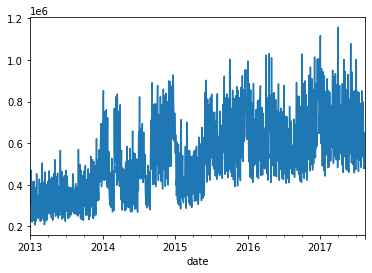

In [40]:
df_agg.plot()

In [41]:
# #VER VALOR-P DEL ESTADISTICO DICKEY-FULLER PARA COMPROBAR ESTACIONARIEDAD

# #Perform ADF Test
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df_agg, autolag="AIC")
adft[0]

-2.923937301952822

In [42]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics",
"p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -2.923937              Test Statistics
1     0.042634                      p-value
2    25.000000             No. of lags used
3  1662.000000  Number of observations used
4    -3.434291          critical value (1%)
5    -2.863281          critical value (5%)
6    -2.567697         critical value (10%)


HIPOTESIS NULA= la serie tiene raíces unitarias, por tanto, no es estacionaria.

El P-value nos indica la probabilidad de que la hipótesis nula no sea rechazada. En nuestro test tenemos que el P-value es  0.007, por lo tanto, existe una probabilidad del 0.8% de que nuestra serie temporal sea no estacionaria. 
Es decir como p-value es menor al 5% no se rechaza la hipotesis nula.

Para finalizar obtenemos los valores críticos para un intervalo de confianza del 1%, del 5% y del 10%. Dado que en este caso el valor de la prueba (-3,50) es menor que todos los valores críticos, por ello la hipótesis nula en la que se evalúa que en nuestra serie temporal existe una raíz unitaria, es rechazada, y por ello, concluimos que estamos ante una serie temporal estacionaria.

Una **raíz unitaria**, es una tendencia estocástica en la serie temporal. Algunas veces se le llama “paseo aleatorio con deriva”. Por tanto, si la serie tiene una raíz unitaria, ésta presenta un patrón sistemático que es impredecible.

Entonces, una serie temporal es estacionaria si un cambio en el tiempo no cambia la forma de la distribución; y las raíces unitarias son una causa de no estacionariedad.

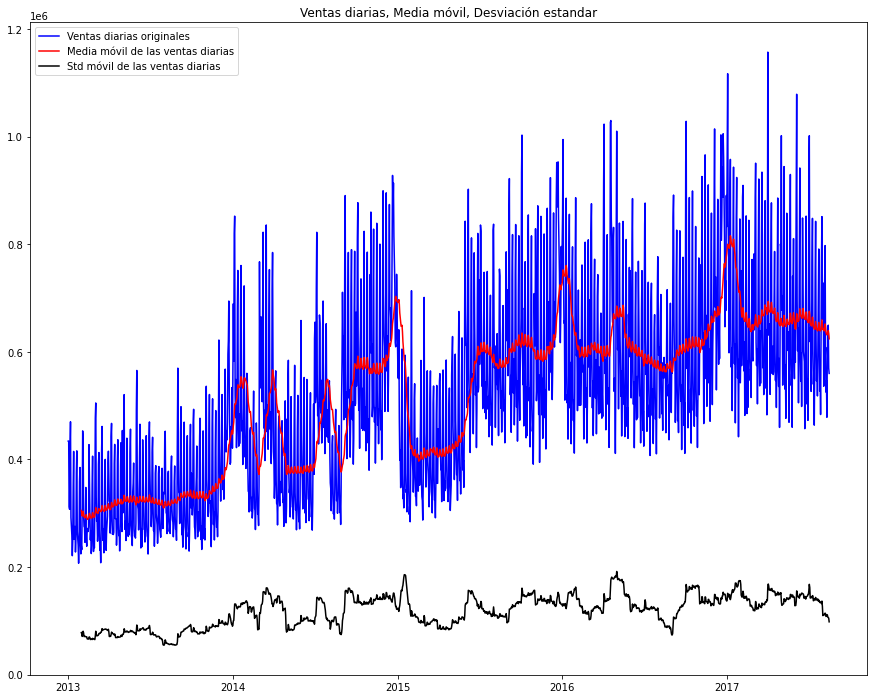

In [43]:
# Calculo de desviación estandar y media móvil para la serie
#https://iartificial.org/ciencia-de-datos/series-temporales-python/
rolling_mean = df_agg.rolling(30).mean()
rolling_std = df_agg.rolling(30).std()
plt.figure(figsize=(15,12))
plt.plot(df_agg, color="blue",label="Ventas diarias originales")
plt.plot(rolling_mean, color="red", label="Media móvil de las ventas diarias")
plt.plot(rolling_std, color="black", label = "Std móvil de las ventas diarias")
plt.title("Ventas diarias, Media móvil, Desviación estandar")
plt.legend(loc="best")

## **Transformaciones:**

### **Logaritmo natural:**

In [ ]:
# Logaritmo natural

df_log = np.log(df_filtered)

## Reemplazar infs con NaN 
#ts_log.replace([np.inf, -np.inf], np.nan, inplace=True)

# plt.figure(figsize=(10, 6))
# sns.boxenplot(data=to_features(df_log), x='Sales', y='Store',
#                 color='blue')
# plt.ticklabel_format(style='plain', axis='x')

# sns.barplot(x='Store', y='Sales', data = to_features(df_log))

ordered_weekdays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
# sns.boxplot(x="Weekday", 
#             y="Sales",
#             order= ordered_weekdays,
#             #hue="Stores", #Descomentar para diferenciar por store
#             data=to_features(df_log),
#             linewidth=2)

axes = df_log.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

### **Diferencias:**


Esta transformación elimina la tendencia de la serie,mantiene las oscilaciones estacionales.

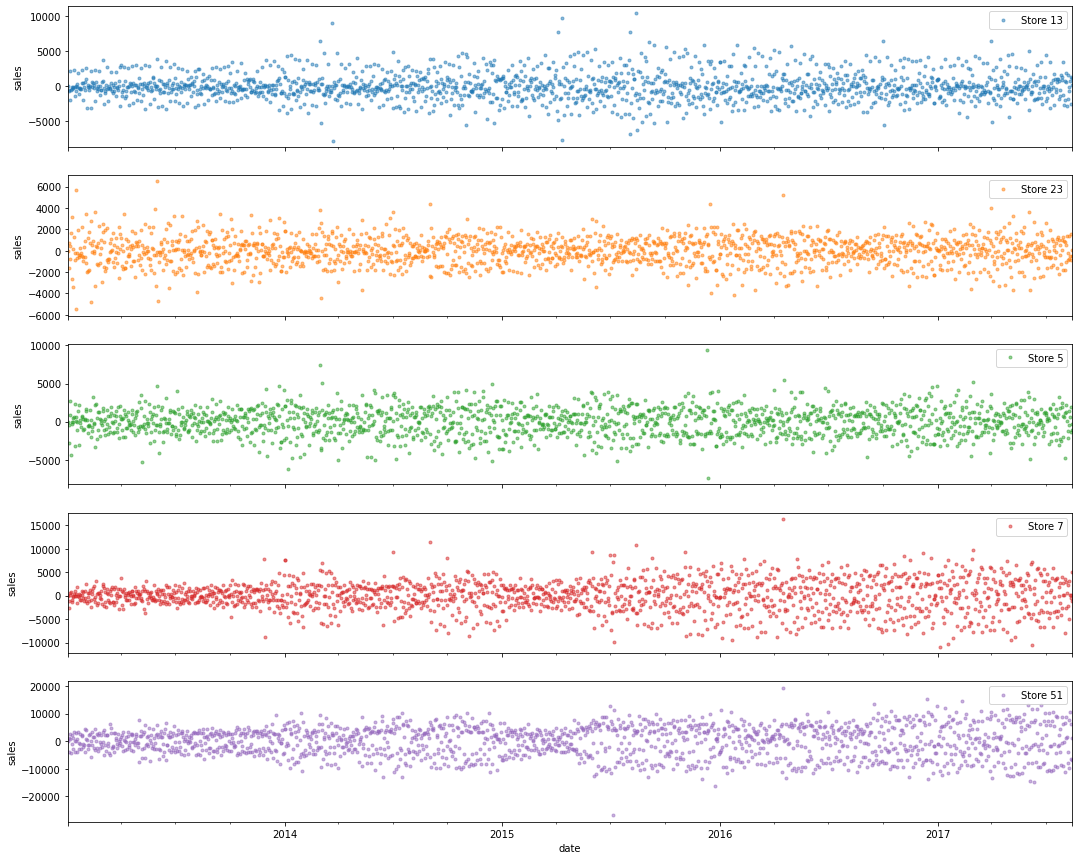

In [54]:
# Diferencias

df_diff = df_filtered.diff(1).dropna()

# plt.figure(figsize=(10, 6))
# sns.boxenplot(data=to_features(df_diff), x='Sales', y='Store',
#                 color='blue')
# plt.ticklabel_format(style='plain', axis='x')

# sns.barplot(x='Store', y='Sales', data = to_features(df_diff))

# sns.boxplot(x="Month", 
#             y="Sales", 
#             #hue="Stores", #Descomentar para diferenciar por store
#             data=to_features(df_diff),
#             linewidth=2)

# sns.boxplot(x="Weekday", 
#             y="Sales",
#             order= ordered_weekdays,
#             #hue="Stores", #Descomentar para diferenciar por store
#             data=to_features(df_diff),
#             linewidth=2)

axes = df_diff.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')


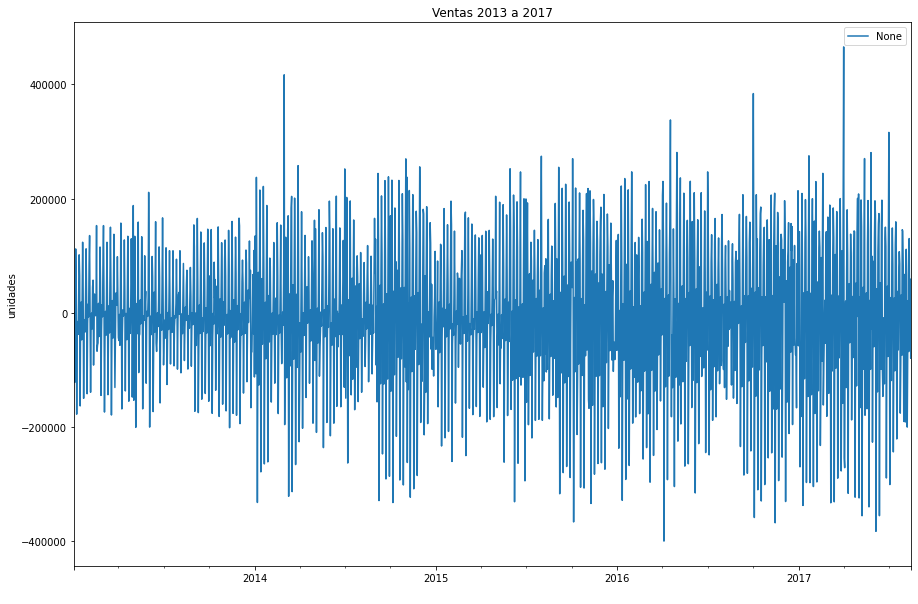

In [57]:
figura(df_agg.diff(1).dropna(),
       'Ventas 2013 a 2017',
       'unidades');

### **Tasa de crecimiento:**

In [79]:
# Tasa de crecimiento (respecto al primer valor)

# Permite analizar y comparar el movimiento de las series entre sucursales 
# sin tener en cuenta los valores absolutos de ventas.

df_growth = df_filtered.div(df_filtered.iloc[0])

# plt.figure(figsize=(10, 6))
# sns.boxenplot(data=to_features(df_growth), x='Sales', y='Store',
#                 color='blue')
# plt.ticklabel_format(style='plain', axis='x')

# sns.barplot(x='Store', y='Sales', data = to_features(df_growth))

# sns.boxplot(x="Weekday", 
#             y="Sales",
#             order= ordered_weekdays,
#             #hue="Stores", #Descomentar para diferenciar por store
#             data=to_features(df_growth),
#             linewidth=2)

# axes = df_growth.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
# for ax in axes:
#     ax.set_ylabel('sales')


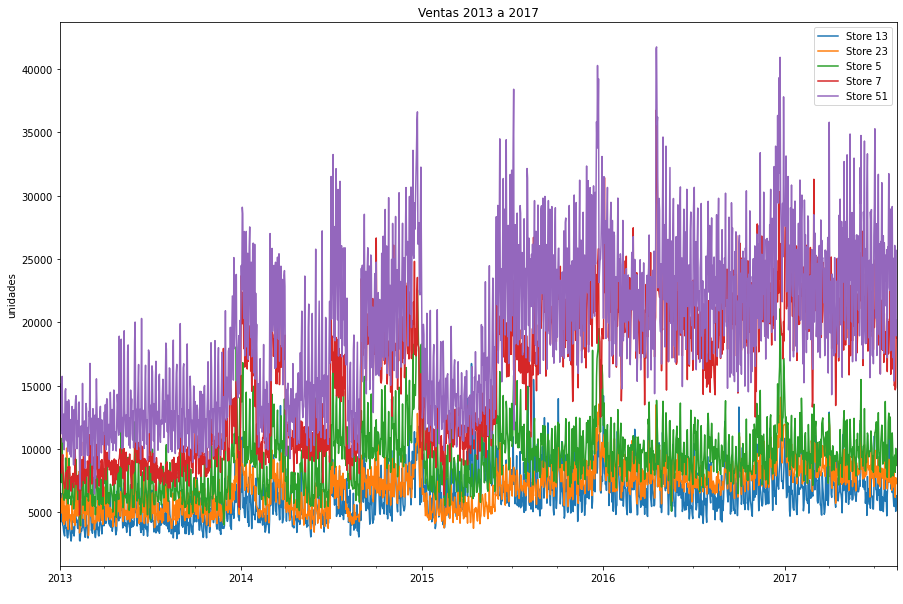

In [78]:
fig= figura(df_filtered,
       'Ventas 2013 a 2017',
       'unidades')

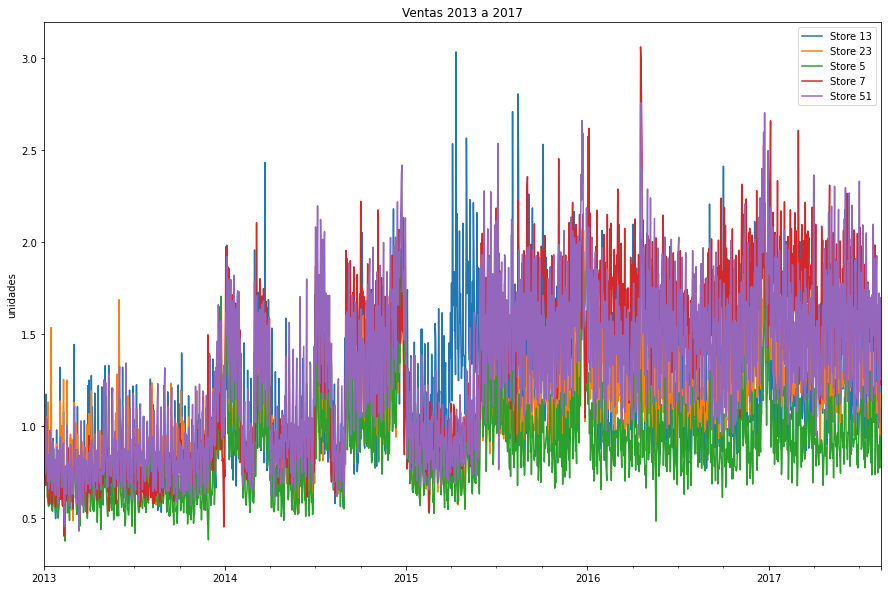

In [77]:
figura(df_filtered.div(df_filtered.iloc[0]).dropna(),
       'Ventas 2013 a 2017',
       'unidades');

Podemos observar cómo en el primer gráfico las series de las sucursales 23 y 51 van prácticamente separadas ya que los valores de la sucursal 51 son más altos, y en el segundo gráfico los movimientos de las series se respetan pero se llevan a rangos de valores similares

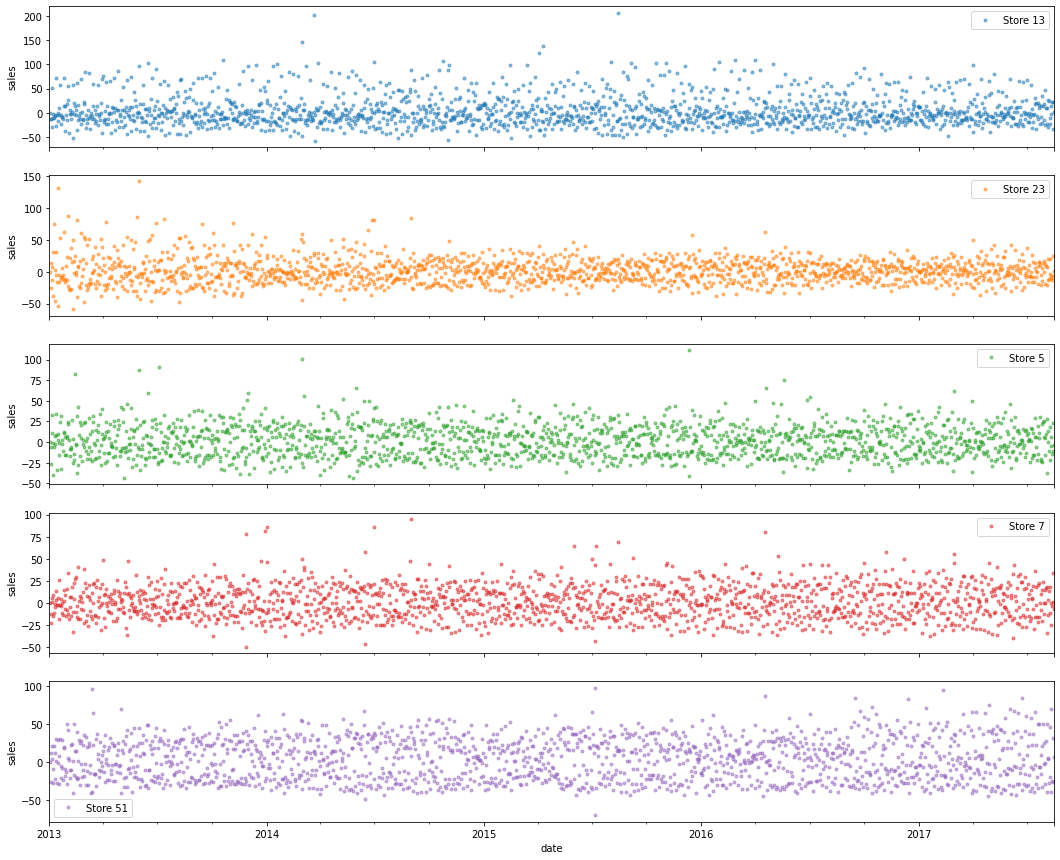

In [83]:
# Tasas de crecimiento de la serie

#Elimina tendencia, mantiene estacionalidad.
#Este método tiene como limitación: asimetría con respecto a cambios positivos y negativos: Subir de 100 a 125 (aumento de 25%), bajar de 125 a 100 (caída de “solo” 20%).
df_growth_2 = df_filtered.pct_change().mul(100)

# plt.figure(figsize=(10, 6))
# sns.boxenplot(data=to_features(df_growth_2), x='Sales', y='Store',
#                 color='blue')
# plt.ticklabel_format(style='plain', axis='x')

axes = df_growth_2.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('sales')

In [ ]:
# ##ALTERNATIVA
# # calculando el porcentaje de variación del día.
# variacion_diaria = df_stores_sum / df_stores_sum.shift(1) - 1
# df_stores_sum['var_diaria'] = variacion_diaria
# df_stores_sum['var_diaria'][:5]

### **Estandarización:**

ESTANDARIZACION DE DATOS

Medir los datos en unidades de desviacion estandar

La estandarización de conjuntos de datos es un requisito común para muchos estimadores de aprendizaje automático implementados en scikit-learn; podrían comportarse mal si las características individuales no se parecen más o menos a datos distribuidos normal patrón: Gaussiano con media cero y varianza unitaria.


#### **StandarScaler**


StandardScaler: transformamos los datos para centrarlos eliminando el valor medio de cada característica, luego la escalamos dividiendo las características no constantes por su desviación estándar usando StandardScaler.


In [108]:
# Estandarización
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
df_std = pd.DataFrame(scaler.fit_transform(df_filtered_full), 
                       index=df_filtered_full.index, 
                       columns=df_filtered_full.columns, dtype=None, copy=False)


# plt.figure(figsize=(10, 6))
# sns.boxenplot(data=to_features(df_std), x='Sales', y='Store',
#                 color='blue')
# plt.ticklabel_format(style='plain', axis='x')

# sns.barplot(x='Store', y='Sales', data = to_features(df_std))

# axes = df_std.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
# for ax in axes:
#     ax.set_ylabel('sales')

#### **RobustScaler**


RobustScaler: Para datos que contienen muchos valores atípicos, es probable que el escalado utilizando la media y la varianza de los datos no funcione muy bien. En estos casos, puede usar RobustScaler como reemplazo directo. Utiliza estimaciones más sólidas para el centro y rango de sus datos.

In [110]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()
df_rscaler = robustscaler.fit_transform(df_filtered_full)
df_rscaler = pd.DataFrame(df_rscaler, columns = df_filtered_full.columns, index=df_filtered_full.index)

# axes = df_rscaler.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
# for ax in axes:
#     ax.set_ylabel('sales')

#### **MinMaxScaler**

Min-MAX: Transforma los datos a un rango fijo. Incluye la solidez contra las desviaciones estándar muy pequeñas en las variables y la preservación de entradas cero en datos ralos.

In [111]:
#Minmax. Escalamos los datos en el rango 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))  
minmax = pd.DataFrame(scaler.fit_transform(df_filtered_full), 
                     columns=df_filtered_full.columns, index=df_filtered_full.index)
# axes = minmax.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
# for ax in axes:
#     ax.set_ylabel('sales')

In [ ]:
# Alternativa
# def min_max_scale(series):
#     return (series - series.min()) / (series.max() - series.min())

# df_norm2 = df_filtered.copy()
# for col in df_norm2.columns:
#     df_norm2[col] = min_max_scale(df_norm2[col])
# df_norm2

### **Normalización:**

Normalizar es cambiar la forma de la distribución de una variable numérica.

Hay dos tipos de transformaciones disponibles: transformaciones de cuantiles y transformaciones de potencia.

Tanto las transformaciones de cuantiles como las de potencia se basan en transformaciones monótonas de las características y, por lo tanto, preservan el rango de los valores a lo largo de cada característica.

QuantileTransformer: proporciona una transformación no paramétrica para asignar los datos a una distribución uniforme con valores entre 0 y 1.

Transformacion Box Cox: Las transformaciones de potencia son una familia de transformaciones paramétricas que tienen como objetivo mapear datos de cualquier distribución lo más cerca posible de una distribución gaussiana.

Estandarización Z

Mediante este método, la media se convertirá en 0 después de la transformación, y la variación y la diferencia estándar se convertirán en 1 (considerada la fórmula de la varianza)

In [112]:
from scipy import stats
from scipy.stats.stats import zscore
zscore_df = stats.zscore(df_filtered_full)
zscore_df= pd.DataFrame(zscore_df, columns=df_filtered_full.columns, index=df_filtered_full.index)     
print(zscore_df)


            Store 34  Store 41  Store 44  Store 45  Store 46  Store 40  \
date                                                                     
2013-01-01 -0.950206 -0.951805 -0.474309 -0.360170  0.191456 -1.385700   
2013-01-02 -0.950206 -0.951805 -0.474309 -0.360170  0.191456 -1.385700   
2013-01-03 -1.532614 -1.335037 -1.136011 -1.112418 -0.838643 -1.496542   
2013-01-04 -1.589423 -1.365046 -0.974926 -0.924378 -0.719199 -1.645844   
2013-01-05 -1.167320 -1.081847 -0.386019 -0.397497  0.198801 -1.304975   
...              ...       ...       ...       ...       ...       ...   
2017-08-11  0.603189  1.138544  0.433416  0.770268  0.631630  1.404885   
2017-08-12 -0.046104  0.819139  0.311987  0.424352  0.326030  2.462672   
2017-08-13  0.400523  1.346995  0.589371  0.993584  0.714294  0.717430   
2017-08-14  0.600729  0.287210 -0.095567  0.187706 -0.100651  1.729710   
2017-08-15  0.433853  0.114397 -0.265394 -0.069764 -0.242461  1.981662   

            Store 47  Store 48  Store

#### **Box Cox:**

In [113]:
df_agg

date
2013-01-01    434231.998948
2013-01-02    434231.998948
2013-01-03    312064.717106
2013-01-04    307413.870095
2013-01-05    419180.355196
                  ...      
2017-08-11    608388.770991
2017-08-12    590574.062189
2017-08-13    649555.601442
2017-08-14    569765.367959
2017-08-15    559930.282946
Freq: D, Length: 1688, dtype: float64

Transformación de BoxCox


Al observar el parámetro de potencia λ de la transformación de boxcox, puede ver que podemos comprimir los valores atípicos cada vez más eligiendo valores más bajos de λ. Además obtenemos un estiramiento "negativo" de valores originales bajos inferiores a uno. Si fijamos λ=0.5 y variamos la constante c podemos observar solo ligeras diferencias de compresión en valores altos. Por otro lado podemos ver que el estiramiento de valores bajos es aún más fuerte de constantes c cercanas a cero.

In [114]:
# Transformaciones de Box y Cox
from scipy.stats import boxcox

df_boxcox = df_filtered_full.copy()
for column in df_filtered_full.columns:
  data , lmbda= boxcox(df_filtered_full[column])
  df_boxcox[column] = data
  print(lmbda)
# plt.figure(figsize=(10, 6))
# sns.boxenplot(data=to_features(df_boxcox), x='Sales', y='Store',
#                 color='blue')
# plt.ticklabel_format(style='plain', axis='x')

# sns.barplot(x='Store', y='Sales', data = to_features(df_boxcox))

# axes = df_boxcox.plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
# for ax in axes:
#     ax.set_ylabel('sales')

0.03919169233839427
0.2833294405658642
0.21859292605723932
0.23072423806012787
-0.1955851106512979
0.6352272694275211
0.17409709382307734
-0.20893592809476894
0.1439666384455036
0.07065326591913247
0.6695776248317757
0.5569750518726306
-0.19517346663638963
0.36666728012667493
-0.029945888248869696
0.17432585652519145
0.10106047250718064
-0.04330675888517021
0.3397691620040632
0.14210938774683995
-0.026551140443525946
0.10672270921838209
0.6610889539860654
0.2539875754904359
-0.12026159871081253
-0.1563829938595137
-0.09789561011924591
-0.6244559400150181
0.4183053399573597
-0.08413870385293268
0.01822182816616893
0.3546784302898389
-0.680710885071366
0.2999210629433984
-0.03498719628516453
0.05556058783919977
0.0012365066979882695


In [115]:
data , lmbda = boxcox(df_agg)
print(lmbda)

0.28348555251382734


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transformacion Box Cox')

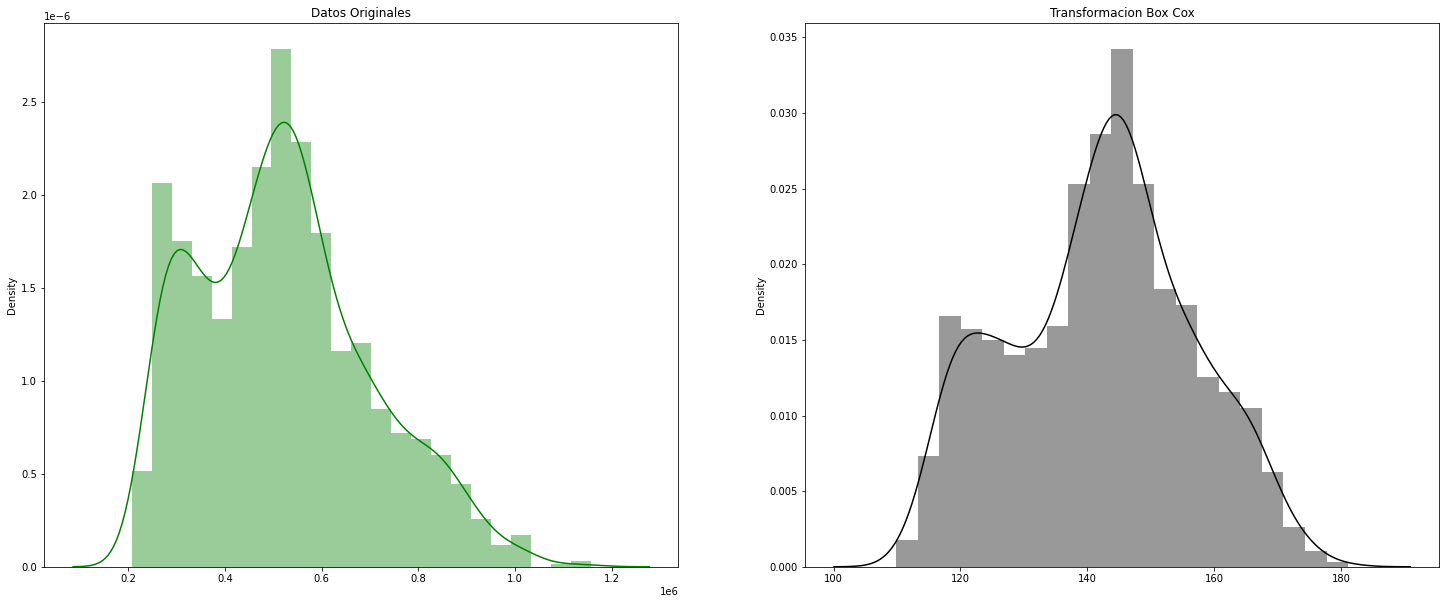

<Figure size 576x576 with 0 Axes>

In [116]:
fig, ax=plt.subplots(1,2,figsize=(25,10))
plt.figure(figsize = (8, 8))
sns.distplot(df_agg, ax=ax[0],color='Green')
ax[0].set_title("Datos Originales")
sns.distplot(data, ax=ax[1],color='black')
ax[1].set_title("Transformacion Box Cox")

### **Comparación de métodos**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

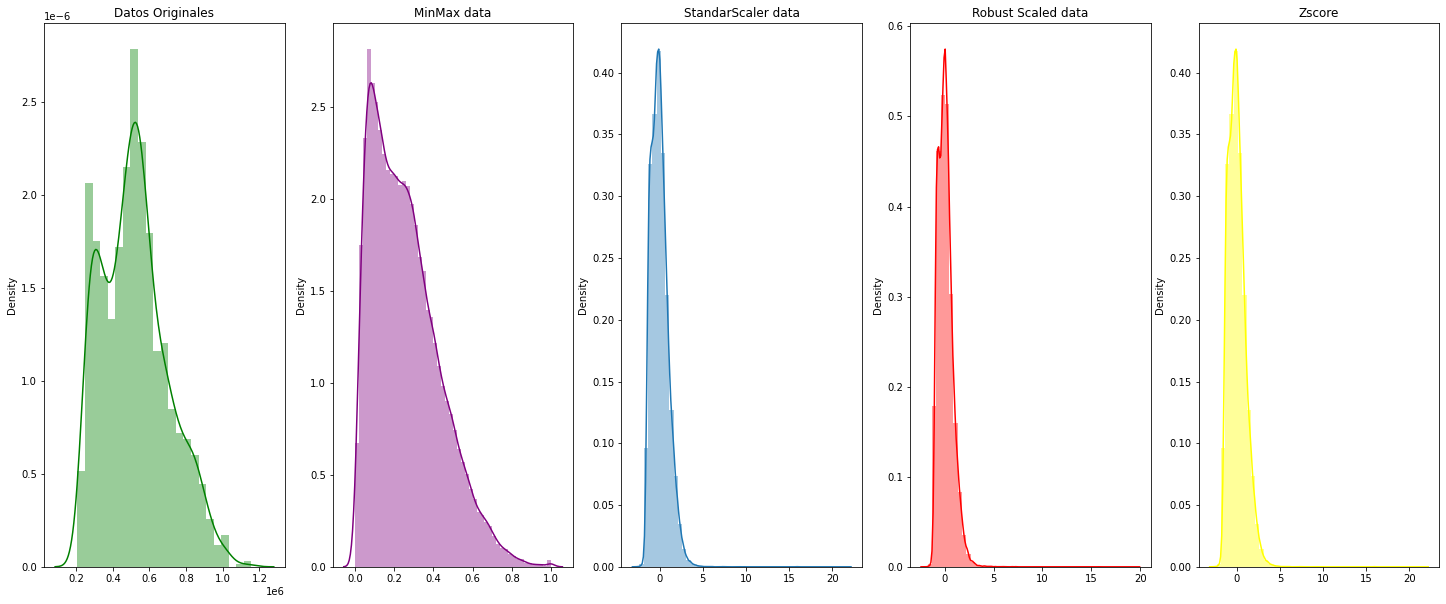

In [118]:
#Comparación
fig, ax=plt.subplots(1,5,figsize=(25,10))
sns.distplot(df_agg, ax=ax[0],color='Green')
ax[0].set_title("Datos Originales")
sns.distplot(minmax, ax=ax[1], color ='Purple')
ax[1].set_title("MinMax data")
sns.distplot(df_std, ax=ax[2])
ax[2].set_title("StandarScaler data")
sns.distplot(df_rscaler, ax=ax[3], color='Red')
ax[3].set_title("Robust Scaled data")
sns.distplot(zscore_df, ax=ax[4], color='Yellow')
ax[4].set_title("Zscore")

plt.show()

Variables dummy


In [120]:

df_sum = pd.DataFrame(data = df_filtered_full.mean(axis=1),index = df_filtered_full.index, columns=['sales'])
# df_sum = pd.DataFrame(data = df_filtered.sum(axis=1),index = df_filtered.index, columns=['sales'])
df_sum['date']= pd.to_datetime(df_filtered_full.index, format="%Y/%m/%d")
df_sum['Year'] = df_sum.date.dt.year
df_sum['Month'] = df_sum.date.dt.month
df_sum['Year_month'] = df_sum.date.dt.strftime('%Y-%m')
df_sum['Weekday'] = df_sum.date.dt.strftime('%A')
df_sum['Day'] = df_sum.date.dt.day
df_sum['diff1'] = df_sum.sales.diff(1)
df_sum['diff7'] = df_sum.sales.diff(7)

In [142]:
df_sum

,sales,date,Year,Month,Year_month,Weekday,Day,diff1,diff7
date,,,,,,,,,
2013-01-01,11735.999972,2013-01-01,2013,1,2013-01,Tuesday,1,NaN,NaN
2013-01-02,11735.999972,2013-01-02,2013,1,2013-01,Wednesday,2,0.000000,NaN
2013-01-03,8434.181543,2013-01-03,2013,1,2013-01,Thursday,3,-3301.818428,NaN
2013-01-04,8308.482976,2013-01-04,2013,1,2013-01,Friday,4,-125.698568,NaN
2013-01-05,11329.198789,2013-01-05,2013,1,2013-01,Saturday,5,3020.715814,NaN
...,...,...,...,...,...,...,...,...,...
2017-08-11,16442.939757,2017-08-11,2017,8,2017-08,Friday,11,3512.487893,-326.349057
2017-08-12,15961.461140,2017-08-12,2017,8,2017-08,Saturday,12,-481.478616,-3811.576608
2017-08-13,17555.556796,2017-08-13,2017,8,2017-08,Sunday,13,1594.095655,-3997.212510


## **Tratamiento de outliers:**

Detección de anomalías con fb prophet

In [122]:
from fbprophet import Prophet
# anom_df = df_sum.reset_index()[['date', 'sales']].rename({'date':'ds', 'sales':'y'}, axis='columns')
anom_df = df_sum[['date', 'sales']].rename({'date':'ds', 'sales':'y'}, axis='columns')
train = anom_df[(anom_df['ds'] >= '2013-01-01') & (anom_df['ds'] <= '2017-06-30')]
test = anom_df[(anom_df['ds'] >= '2017-06-30') & (anom_df['ds'] <= '2017-08-17')]
# train = df_sum.loc['2013-01':'2017-06']
# test = df_sum.loc['2017-06':'2017-08']


In [ ]:
anom_df

In [144]:
# Modelo multiplicativo ya que la varianza de los datos es proporcional a la tendencia
# (Los datos varían más a medida que aumenta la tendencia)
m = Prophet(seasonality_mode = 'multiplicative')
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [145]:
# Los 46 períodos coinciden con la cantidad de días separados para test
future = m.make_future_dataframe(periods=46, freq='D')

In [148]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1683,2017-08-11,14794.859738,11960.068708,17477.132809
1684,2017-08-12,20348.655711,17366.879368,23033.920857
1685,2017-08-13,22503.833246,19937.954647,25201.353258
1686,2017-08-14,15728.836731,12954.924011,18583.161433
1687,2017-08-15,14280.019806,11713.310505,17017.509106


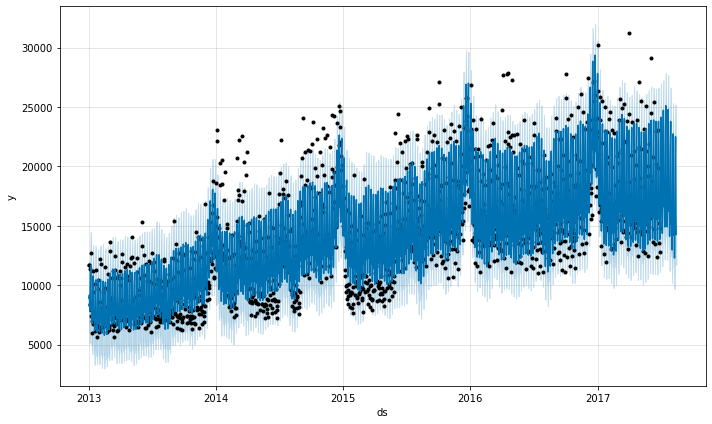

In [149]:
result = pd.concat([anom_df.set_index('ds')['y'], forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]], axis=1)
fig1 = m.plot(forecast)

In [ ]:
result

In [ ]:
comp = m.plot_components(forecast)

In [155]:
result['error'] = result['y'] - result['yhat']
result['uncertainty'] = result['yhat_upper'] - result['yhat_lower']

In [156]:
# result['anomaly'] = result.apply(lambda x: 'Yes' if((x['y'] > x['yhat_upper']) | (x['y'] < x['yhat_lower'])) else 'No', axis = 1)
 
# result['anomaly'] = result.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.2 * x['uncertainty']) else 'No', axis = 1)

result['anomaly'] = result.apply(lambda x: 'Yes' if((x['y'] > x['yhat_upper'] + 0.8 * x['uncertainty']) | (x['y'] < x['yhat_lower'] - 0.8 * x['uncertainty'])) else 'No', axis = 1)

In [ ]:
result[result['anomaly'] == 'Yes']

In [153]:
#visualize the anomaly data
fig = px.scatter(result.reset_index(), x='ds', y='y', color='anomaly', title='Sales')
#slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='Y', step="year", stepmode="backward"),
              dict(count=4, label='4M', step="month", stepmode="backward"),
              dict(count=1, label='M', step="month", stepmode="backward"),
              dict(step="all")
        ])
    )
)
fig.show()